In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as mp
pd.options.mode.chained_assignment = None

In [3]:
df=pd.read_csv("covid_19_clean_complete.csv")
pd.set_option('display.max_rows',190)
df1=df.drop(["Province/State","WHO Region","Lat","Long"],axis=1)
df2=df1[(df1["Country/Region"]=="India")]

In [4]:
df3=df2.copy()
df2["Date"] = pd.to_datetime(df2["Date"])
df3['date']=df2['Date'].dt.day.astype("str")+"/"+df2['Date'].dt.month.astype("str")
df3['month']=df2['Date'].dt.month.astype("str")
df3=df3.drop("Date",axis=1)
df3.tail()

,Country/Region,Confirmed,Deaths,Recovered,Active,date,month
47892,India,1288108,30601,817209,440298,23/7,7
48153,India,1337024,31358,849432,456234,24/7,7
48414,India,1385635,32060,885573,468002,25/7,7
48675,India,1435616,32771,917568,485277,26/7,7
48936,India,1480073,33408,951166,495499,27/7,7


In [5]:
df4=df3.groupby("month").sum()
df4["DeathPercentage"]=(df4.Deaths.astype("int")/(df4.Confirmed.astype("int")))*100
df4

,Confirmed,Deaths,Recovered,Active,DeathPercentage
month,,,,,
1,2,0,0,2,0.000000
2,84,0,42,42,0.000000
3,10252,226,818,9208,2.204448
4,447607,14417,85811,347379,3.220906
5,3088494,94154,1216954,1777386,3.048541
6,10951713,331856,5916008,4703849,3.030174
7,26385312,671178,16564087,9150047,2.543756


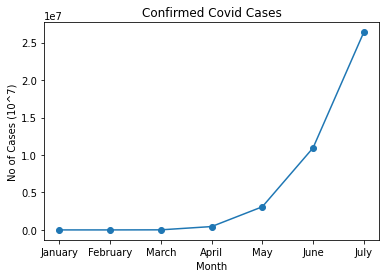

In [6]:
m=["January","February","March","April","May","June","July"]
y=df3.groupby("month").sum().Confirmed
mp.plot(m,y)
mp.scatter(m,y)
mp.xlabel('Month')
mp.ylabel('No of Cases (10^7)')
mp.title('Confirmed Covid Cases')
mp.show()

Here, we can see that the Number of Covid cases rose exponentially throught the country from April 2020 to July 2020. This corresponds to first wave of Covid-19 in India.

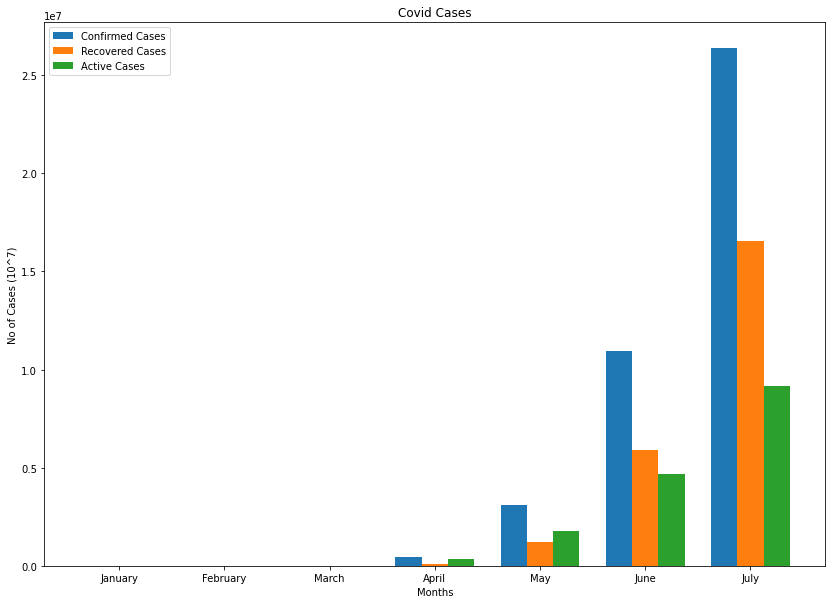

In [7]:
m=["January","February","March","April","May","June","July"]
y=df3.groupby("month").sum().Confirmed
z=df3.groupby("month").sum().Active
a=df3.groupby("month").sum().Recovered 
fig = mp.figure(figsize =(14,10))
i = np.arange(len(m))
w=0.25
mp.bar(i,y,w,label = "Confirmed Cases")
mp.bar(i+w,a,w,label = "Recovered Cases")
mp.bar(i+w+w,z,w,label = "Active Cases")
mp.xticks(i+w, m)
mp.xlabel('Months')
mp.title('Covid Cases')
mp.ylabel('No of Cases (10^7)')
mp.legend()
mp.show()

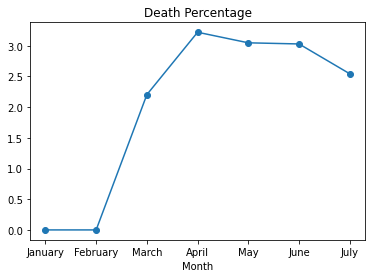

In [8]:
m=["January","February","March","April","May","June","July"]
y=df4.DeathPercentage
mp.plot(m,y)
mp.scatter(m,y)
mp.xlabel('Month')
mp.title('Death Percentage')
mp.show()
# Deaths Vs Confirmed Cases Percentage Graph

Covid cases continued to increase after the first wave. Initially the recovery rate was low and the number of active cases were more than the number of recovered cases. This was seen as hospitals across the country suffered an initial shock due to the sudden exponential increase in cases and lack of data about the virus. But with time the situation improved and the recovery rate increased both due to improved facilities in hospitals, such as increased oxygen supply, more ventillators, etc, and a series of country-wide lockdowns. This can be seen in the first graph as the number of recovered cases overtook the number of active cases. Also, this can be seen in the second graph as the Death percentage took a fall in the later months.

The highest Death Rate due to Covid-19 in these month was in April.

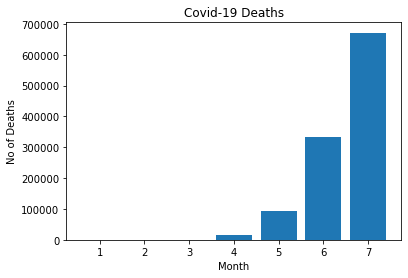

In [9]:
x=df3.month.unique()
y=df3.groupby("month").sum().Deaths
mp.xlabel('Month')
mp.title('Covid-19 Deaths')
mp.ylabel('No of Deaths')
mp.bar(x,y)
mp.show()

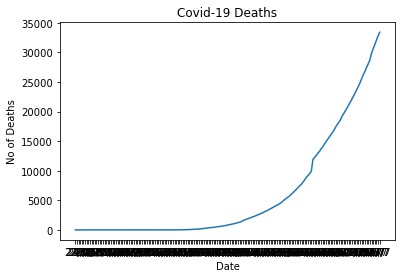

In [10]:
x=df3.date
y=df3.Deaths
mp.plot(x,y)
mp.xlabel('Date')
mp.title('Covid-19 Deaths')
mp.ylabel('No of Deaths')
mp.show()

The number of deaths across the country increased exponentially as the pandemic spread and the situation worsened.  
The highest number of deaths in these months was in July.